In [36]:
# Import required libraries
import nltk
import pandas as pd

nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

# Load data
reviews = [(movie_reviews.raw(fileid), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(reviews, columns=['Review', 'Sentiment'])


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\mjuna\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
# Basic inspection
print(df.head())
print(df.info())
print(df['Sentiment'].value_counts())

                                              Review Sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard's quick movie review \ndamn ...       neg
2  it is movies like these that make a jaded movi...       neg
3   " quest for camelot " is warner bros . ' firs...       neg
4  synopsis : a mentally unstable man undergoing ...       neg
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2000 non-null   object
 1   Sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Sentiment
neg    1000
pos    1000
Name: count, dtype: int64


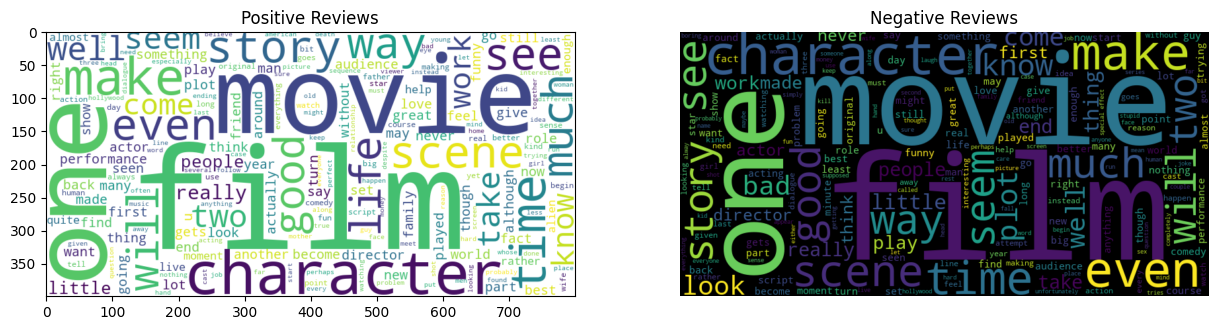

In [19]:
import matplotlib.pyplot as plt  # Add this line at the top of your code
from wordcloud import WordCloud

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()


In [20]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(review):
    tokens = nltk.word_tokenize(review.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjuna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#using logistic regression

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Sentiment'].apply(lambda x: 1 if x == 'pos' else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       302
           1       0.81      0.84      0.82       298

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



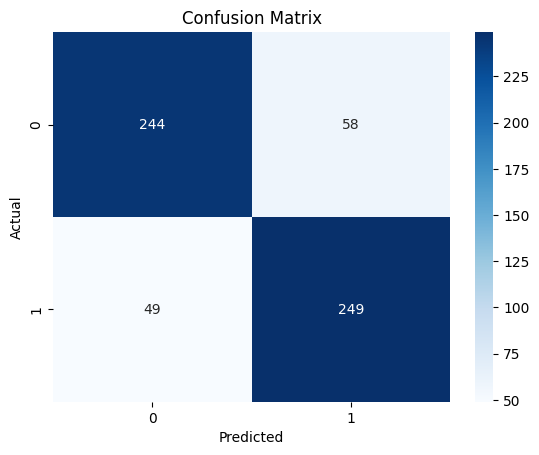

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
